# **Redução de dimensionalidade**

## **Análise de Componentes Principais (PCA)**

> **Principal Component Analysis (PCA)** é o algoritmo de redução de dimensionalidade mais popular. Basicamente, ele funciona da seguinte maneira: (*i*) identifica o hiperplano que está mais próximo dos dados e, em seguida, (*ii*) projeta os dados sobre esse hiperplano. Em outras palavras, O PCA é utilizado sempre que se deseja simplificar a complexidade dos dados mantendo o máximo de informação relevante possível.

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/PCA.png?raw=true" width="700px"/>

Fonte: [PCA clearly explained —When, Why, How to use it and feature importance: a guide in Python](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e)

<br>

- Input: dados brutos (*features*)
- Output: variáveis não-correlacionadas ($PC_1$, $PC_2$, $\cdots$, $PC_n$)
- Requisitos: variáveis numericas e padronização dos dados.
- $PC_n$ é dada como uma combinação linear das variáveis de entrada:

\begin{equation}
  \vec{u} = a_1 \vec{v_1} + a_2 \vec{v_2} + \cdots + a_n \vec{v_n}
\end{equation}

- **Maximização de Variância:** Os componentes principais são ordenados de forma que o primeiro componente capture a maior variância nos dados. Cada componente subsequente captura a variância restante sob a restrição de ser ortogonal aos anteriores.

- Fundamenta-se no conceito de **Autovalores**, **Autovetores**, e na **Decomposição em Valores Singulares (SVD)** para calcular os componentes principais.

<br>

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/Var-vs-PC.png?raw=true" width="400px"/>

> Ponto de partida:

\begin{equation*}
  n = \sqrt{\text{features}}
\end{equation*}

In [78]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/campaings.csv' -O 'campaings.csv'

In [79]:
import pandas as pd
from sklearn.decomposition import PCA

In [80]:
campaings = pd.read_csv('campaings.csv')
campaings.head()

,ID,Education,Age,DaysAsCustomer,Marital_Status,Kidhome,Teenhome,Country,Recency,Purchases,Spent_percent,Income,CampaingsAccepted,Complain,Spent
0,1826,Graduation,53,3392,Divorced,0,0,Spain,0,15,0.088457,84835.0,0,0,1190
1,1,Graduation,62,3393,Single,0,0,Canada,0,18,0.042891,57091.0,1,0,577
2,10476,Graduation,65,3426,Married,0,1,USA,0,11,0.018658,67267.0,0,0,251
3,1386,Graduation,56,3428,Together,1,1,Australia,0,4,0.000818,32474.0,0,0,11
4,5371,Graduation,34,3461,Single,1,0,Spain,0,8,0.006764,21474.0,1,0,91


In [81]:
campaings = campaings[[
    'Age', 'DaysAsCustomer', 'Kidhome',
    'Teenhome', 'Recency', 'Purchases',
    ' Income ', 'CampaingsAccepted',
    'Complain', 'Spent'
]]

campaings.head()

,Age,DaysAsCustomer,Kidhome,Teenhome,Recency,Purchases,Income,CampaingsAccepted,Complain,Spent
0,53,3392,0,0,0,15,84835.0,0,0,1190
1,62,3393,0,0,0,18,57091.0,1,0,577
2,65,3426,0,1,0,11,67267.0,0,0,251
3,56,3428,1,1,0,4,32474.0,0,0,11
4,34,3461,1,0,0,8,21474.0,1,0,91


In [82]:
# Normalização:
campaings['Age'] = campaings['Age'].apply(lambda x: ( x - campaings['Age'].mean() ) / campaings['Age'].std() )
campaings['DaysAsCustomer'] = campaings['DaysAsCustomer'].apply(lambda x: ( x - campaings['DaysAsCustomer'].mean() ) / campaings['DaysAsCustomer'].std() )
campaings['Kidhome'] = campaings['Kidhome'].apply(lambda x: ( x - campaings['Kidhome'].mean() ) / campaings['Kidhome'].std() )
campaings['Teenhome'] = campaings['Teenhome'].apply(lambda x: ( x - campaings['Teenhome'].mean() ) / campaings['Teenhome'].std() )
campaings['Purchases'] = campaings['Purchases'].apply(lambda x: ( x - campaings['Purchases'].mean() ) / campaings['Purchases'].std() )
campaings[' Income '] = campaings[' Income '].apply(lambda x: ( x - campaings[' Income '].mean() ) / campaings[' Income '].std() )
campaings['CampaingsAccepted'] = campaings['CampaingsAccepted'].apply(lambda x: ( x - campaings['CampaingsAccepted'].mean() ) / campaings['CampaingsAccepted'].std() )
campaings['Complain'] = campaings['Complain'].apply(lambda x: ( x - campaings['Complain'].mean() ) / campaings['Complain'].std() )
campaings['Spent'] = campaings['Spent'].apply(lambda x: ( x - campaings['Spent'].mean() ) / campaings['Spent'].std() )

# Resultado:
campaings.head()

,Age,DaysAsCustomer,Kidhome,Teenhome,Recency,Purchases,Income,CampaingsAccepted,Complain,Spent
0,-0.092536,-1.683034,-0.823022,-0.929097,0,0.014375,1.294687,-0.438942,-0.095477,0.967617
1,0.676680,-1.678095,-0.823022,-0.929097,0,0.405491,0.192799,1.032845,-0.095477,-0.049829
2,0.933086,-1.515092,-0.823022,0.908340,0,-0.507115,0.596952,-0.438942,-0.095477,-0.590918
3,0.163869,-1.505213,1.039297,0.908340,0,-1.419721,-0.784896,-0.438942,-0.095477,-0.989266
4,-1.716438,-1.342211,1.039297,-0.929097,0,-0.898232,-1.221775,1.032845,-0.095477,-0.856484


In [83]:
(len(campaings.columns.to_list()))**(0.5)

3.1622776601683795

In [84]:
pca = PCA(n_components =3)
pca.fit(campaings)

PCA(n_components=3)

In [85]:
print(pca.explained_variance_ratio_)

[0.98937194 0.00356962 0.00168879]


In [86]:
print(pca.singular_values_)

[1361.19255919   81.76180686   56.23769333]


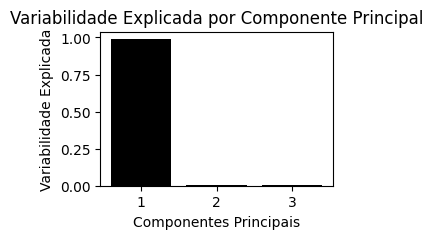

In [87]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
components = range(1, len(explained_variance) + 1)

fig, ax = plt.subplots(figsize=(3,2));
plt.bar(components, explained_variance, color='k');
plt.xlabel('Componentes Principais');
plt.ylabel('Variabilidade Explicada');
plt.title('Variabilidade Explicada por Componente Principal');
plt.xticks(components);


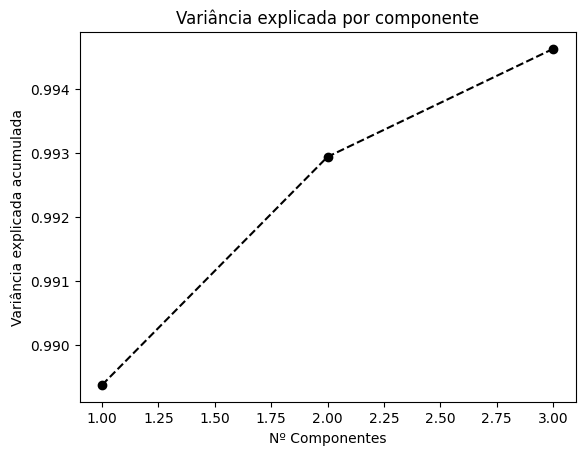

In [88]:
fig, ax = plt.subplots()
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_.cumsum(), 'o--k')
plt.title('Variância explicada por componente');
plt.xlabel('Nº Componentes');
plt.ylabel('Variância explicada acumulada');

### **K-means com PCA**

In [89]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=3)
dados_reduzidos = pca.fit_transform(campaings)

# Aplique o K-means nos dados reduzidos
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(dados_reduzidos)

# Adicione os rótulos dos clusters ao DataFrame original
campaings['Cluster'] = clusters

# Se quiser, também pode criar um DataFrame com os dados reduzidos
df_reduzido = pd.DataFrame(dados_reduzidos, columns=[f'PC{i+1}' for i in range(dados_reduzidos.shape[1])])
df_reduzido['Cluster'] = clusters

In [90]:
campaings.head()

,Age,DaysAsCustomer,Kidhome,Teenhome,Recency,Purchases,Income,CampaingsAccepted,Complain,Spent,Cluster
0,-0.092536,-1.683034,-0.823022,-0.929097,0,0.014375,1.294687,-0.438942,-0.095477,0.967617,3
1,0.676680,-1.678095,-0.823022,-0.929097,0,0.405491,0.192799,1.032845,-0.095477,-0.049829,3
2,0.933086,-1.515092,-0.823022,0.908340,0,-0.507115,0.596952,-0.438942,-0.095477,-0.590918,3
3,0.163869,-1.505213,1.039297,0.908340,0,-1.419721,-0.784896,-0.438942,-0.095477,-0.989266,3
4,-1.716438,-1.342211,1.039297,-0.929097,0,-0.898232,-1.221775,1.032845,-0.095477,-0.856484,3


In [91]:
df_reduzido.head()

,PC1,PC2,PC3,Cluster
0,-49.009186,1.136936,-0.661606,3
1,-49.009941,0.845669,-0.419849,3
2,-49.008722,-0.030663,1.482691,3
3,-49.008871,-2.189747,0.863543,3
4,-49.011096,-1.962038,-1.994027,3


/tmp/ipython-input-92-2665565395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=campaings, y='Recency', x='Cluster', palette='bright')


<Axes: xlabel='Cluster', ylabel='Recency'>

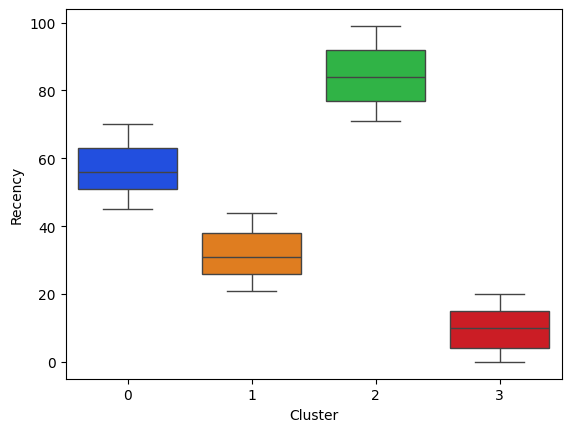

In [92]:
import seaborn as sns

sns.boxplot(data=campaings, y='Recency', x='Cluster', palette='bright')

<Axes: xlabel='PC2', ylabel='PC1'>

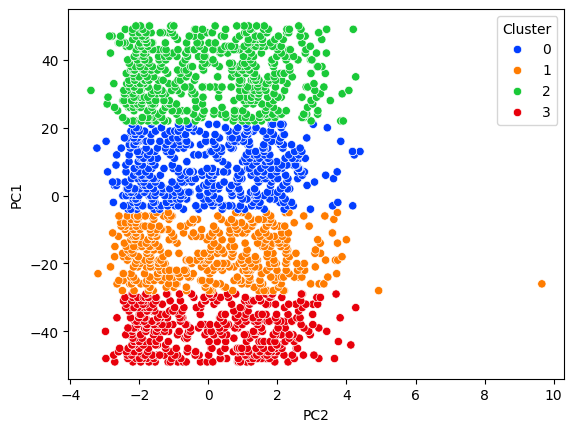

In [93]:
sns.scatterplot(data=df_reduzido, y='PC1', x='PC2', hue='Cluster', palette='bright')